ideas:
1. daily trading volume (cumulative and  --> select date
2. positions on expiration date overall
3. positions on expiration date per product

In [336]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [337]:
df = pd.read_excel('wolverine_excel.xlsx')

In [338]:
print(len(df)-len(df.dropna()),'rows with na values')

10967 rows with na values


In [339]:
df.dropna(inplace=True)
df.drop(columns='opraTradeType', inplace=True)
df.reset_index(drop=True, inplace=True)

In [340]:
df

,tradeDate,trade_id,tradeTime,undsym,expdate,callPut,tradeSize,side
0,2022-01-24,45627b9b-73c8-46a2-b0e3-d35cd84265f3,08:35:09.432000,FB,2023-01-20,C,8,B
1,2022-01-24,1a05aa59-60cf-44b7-8317-48505fc36e2b,08:35:09.432000,FB,2023-01-20,C,8,B
2,2022-01-24,915c1083-48a1-443f-8116-b71936ee50ff,08:35:09.445000,AMD,2022-01-28,P,1,S
3,2022-01-24,45dd0184-fe84-42fa-bdea-59fa70783ae7,08:35:09.456000,TSLA,2022-01-28,C,1,B
4,2022-01-24,54e875ea-9d37-4794-892d-be0c0455d64b,08:35:10.267000,FB,2022-02-04,P,1,S
...,...,...,...,...,...,...,...,...
67048,2022-01-26,6c2d5f46-5d7e-4ed6-bb32-5d58191d54b2,14:57:48.914000,TSLA,2022-02-04,P,1,S
67049,2022-01-26,f032f17f-d995-4585-80c0-92caae3d2608,14:57:48.914000,TSLA,2022-01-28,P,1,B
67050,2022-01-26,53c84dd3-c9ca-45b1-b9e9-e1f9de6b3f0a,14:57:49.015000,NVDA,2022-01-28,P,1,S
67051,2022-01-26,d8490c00-9ecd-4888-b4c2-6bb12f352ea5,14:57:49.015000,NVDA,2022-01-28,P,1,B


In [299]:
#prompt --> select date from a dropdown list
date = '2022-01-24'

In [300]:
df_specific_date = df[df['tradeDate']==date]
df_specific_date.drop(columns='tradeDate', inplace=True)
df_specific_date.sort_values(by='tradeTime', inplace=True)
df_specific_date.reset_index(inplace=True, drop=True)
df_specific_date['rollingVolume'] = df_specific_date.tradeSize.cumsum()
daily_median = df.groupby('tradeDate').agg({
    'tradeSize': sum
}).tradeSize.median()
daily_mean = df.groupby('tradeDate').agg({
    'tradeSize': sum
}).tradeSize.mean()

/Users/jacob/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-300-7d6021420b84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific_date.sort_values(by='tradeTime', inplace=True)
<ipython-input-300-7d6021420b84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specifi

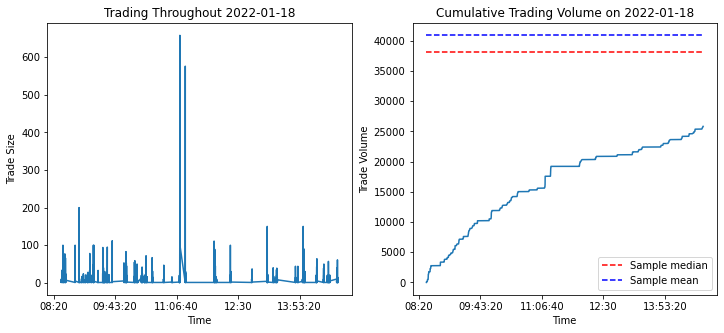

In [324]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df_specific_date.plot(x='tradeTime', y='tradeSize', legend=False, ylabel='Trade Size', xlabel='Time', ax=ax1, title=f'Trading Throughout {date}')
df_specific_date.plot(x='tradeTime', y='rollingVolume', legend=False, ylabel='Trade Volume', xlabel='Time', ax=ax2, title=f'Cumulative Trading Volume on {date}', label='')
ax2.hlines(y=daily_median, xmin=df_specific_date.tradeTime.min(), xmax=df_specific_date.tradeTime.max(), colors='r', label='Sample median', linestyle='dashed')
ax2.hlines(y=daily_mean, xmin=df_specific_date.tradeTime.min(), xmax=df_specific_date.tradeTime.max(), colors='b', label='Sample mean', linestyle='dashed')
ax2.legend(loc=4)
fig.set_size_inches(12, 5)
#plt.plot(x, y, label='_nolegend_')

In [311]:
df_specific_date.tradeTime.max()

datetime.time(14, 44, 57, 416000)

,trade_id,tradeTime,undsym,expdate,callPut,tradeSize,side,rollingVolume
0,155bd461-bb18-47fd-a91e-872a56f48849,11:10:57,AAPL,2022-01-21 00:00:00,C,658,S,17416
1,4773c166-d08a-4c78-8ca2-568edba0b4df,11:18:16,AAPL,2022-01-21 00:00:00,C,576,S,18387
2,7828f340-6d76-40bd-9880-ddf48401b854,11:10:57,AAPL,2022-01-28 00:00:00,C,329,S,16758
3,425202b0-17aa-4ea9-bd81-f853076d9e16,11:18:16,AAPL,2022-01-28 00:00:00,C,288,B,18675
4,248b2360-f671-4e9c-b215-36b2dd27e6b8,08:54:21,TSLA,2022-01-21 00:00:00,P,200,B,3695
5,4130b2c3-328f-4609-a5a9-6778c552ba12,13:57:57,TSLA,2022-01-21 00:00:00,C,150,B,23213
6,452f191f-de59-483f-9670-6459159b0001,13:09:17,AAPL,2022-01-21 00:00:00,C,150,B,21540
7,20f07c8d-3bfd-4301-b416-0982e5d9ff0e,11:18:16,AAPL,2022-01-21 00:00:00,C,114,S,17811
8,7a83726b-7a16-43d3-a3af-91e01b37e2c2,09:39:21,NVDA,2022-01-21 00:00:00,P,112,B,10087
9,48566f6f-421c-4966-9448-c2bf8f233379,11:57:18,JPM,2022-02-18 00:00:00,P,111,B,19326


In [335]:
top_10 = df_specific_date.sort_values(by='tradeSize', ascending=False).head(n=10)
top_10.reset_index(inplace=True, drop=True)
top_10.style.format({"tradeTime": lambda t: t.strftime("%H:%M:%S")})

,trade_id,tradeTime,undsym,expdate,callPut,tradeSize,side,rollingVolume
0,155bd461-bb18-47fd-a91e-872a56f48849,11:10:57,AAPL,2022-01-21 00:00:00,C,658,S,17416
1,4773c166-d08a-4c78-8ca2-568edba0b4df,11:18:16,AAPL,2022-01-21 00:00:00,C,576,S,18387
2,7828f340-6d76-40bd-9880-ddf48401b854,11:10:57,AAPL,2022-01-28 00:00:00,C,329,S,16758
3,425202b0-17aa-4ea9-bd81-f853076d9e16,11:18:16,AAPL,2022-01-28 00:00:00,C,288,B,18675
4,248b2360-f671-4e9c-b215-36b2dd27e6b8,08:54:21,TSLA,2022-01-21 00:00:00,P,200,B,3695
5,4130b2c3-328f-4609-a5a9-6778c552ba12,13:57:57,TSLA,2022-01-21 00:00:00,C,150,B,23213
6,452f191f-de59-483f-9670-6459159b0001,13:09:17,AAPL,2022-01-21 00:00:00,C,150,B,21540
7,20f07c8d-3bfd-4301-b416-0982e5d9ff0e,11:18:16,AAPL,2022-01-21 00:00:00,C,114,S,17811
8,7a83726b-7a16-43d3-a3af-91e01b37e2c2,09:39:21,NVDA,2022-01-21 00:00:00,P,112,B,10087
9,48566f6f-421c-4966-9448-c2bf8f233379,11:57:18,JPM,2022-02-18 00:00:00,P,111,B,19326


In [273]:
#prompt --> select product, select expiration date from drop downs
prod = 'AAPL'
exp = '2022-01-28'

In [274]:
specific_prod_exp = df[(df['expdate']==exp)&(df['undsym']==prod)]
specific_prod_exp.reset_index(inplace=True, drop=True)
specific_prod_exp.drop(columns=['tradeDate', 'tradeTime'], inplace=True)

/Users/jacob/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [275]:
long_call = specific_prod_exp[(specific_prod_exp['callPut']=='C')&(specific_prod_exp['side']=='B')]['tradeSize'].sum()
short_call = specific_prod_exp[(specific_prod_exp['callPut']=='C')&(specific_prod_exp['side']=='S')]['tradeSize'].sum()
long_put = specific_prod_exp[(specific_prod_exp['callPut']=='P')&(specific_prod_exp['side']=='B')]['tradeSize'].sum()
short_put = specific_prod_exp[(specific_prod_exp['callPut']=='P')&(specific_prod_exp['side']=='S')]['tradeSize'].sum()
values = [long_call, short_call, long_put, short_put]

Text(0.5, 1.0, 'Overall Position for AAPL Expiring on 2022-01-28')

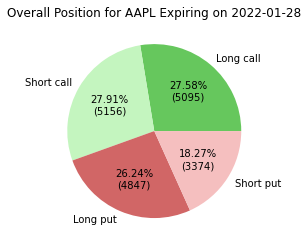

In [276]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.2f}%\n({v:d})'.format(pct, v=val)
    return my_format

mycolors = ["#66c75d", "#c4f5bf", "#d16666", "#f5bfbf"]

plt.pie(values, labels=['Long call', 'Short call', 'Long put', 'Short put'], autopct=autopct_format(values), colors=mycolors)
plt.title(f"Overall Position for {prod} Expiring on {exp}")
#fig = plt.figure()

In [277]:
pl = pd.DataFrame({'test': df.expdate.unique()})

In [278]:
pl.sort_values(by='test')

,test
10,2022-01-21
1,2022-01-28
2,2022-02-04
13,2022-02-11
3,2022-02-18
12,2022-02-25
7,2022-03-04
4,2022-03-18
8,2022-04-14
11,2022-05-20


In [279]:
df_specific_date.tradeSize.sum()

25831

In [280]:
test = df_specific_date.groupby('undsym').agg({
    'tradeSize': sum
}).sort_values(by='tradeSize', ascending=False)

In [281]:
df_exp_date = df[df['expdate']==exp]

In [282]:
labels = df_exp_date.undsym.unique()

long_calls = []
short_calls = []
long_puts = []
short_puts = []
for x in labels:
    df = df_exp_date[df_exp_date['undsym']==x]
    lc = df[(df['callPut']=='C')&(df['side']=='B')]['tradeSize'].sum()
    print(lc, x)
    long_calls.append(lc)
    sc = df[(df['callPut']=='C')&(df['side']=='S')]['tradeSize'].sum()
    print(sc, x)
    short_calls.append(sc)
    lp = df[(df['callPut']=='P')&(df['side']=='B')]['tradeSize'].sum()
    print(lp, x)
    long_puts.append(lp)
    sp = df[(df['callPut']=='P')&(df['side']=='S')]['tradeSize'].sum()
    print(sp, x)
    long_calls.append(sp)

2307 AMD
2353 AMD
1510 AMD
1441 AMD
8190 TSLA
6010 TSLA
6935 TSLA
4681 TSLA
1630 FB
1884 FB
1006 FB
1242 FB
3842 NVDA
5130 NVDA
3520 NVDA
2974 NVDA
5095 AAPL
5156 AAPL
4847 AAPL
3374 AAPL
1546 AMZN
1277 AMZN
1316 AMZN
1262 AMZN
1404 INTC
571 INTC
882 INTC
756 INTC
575 JPM
546 JPM
186 JPM
238 JPM
283 GS
209 GS
143 GS
107 GS
62 GOOG
79 GOOG
226 GOOG
81 GOOG


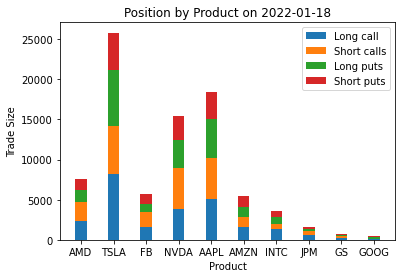

In [283]:
import matplotlib.pyplot as plt

labels = df_exp_date.undsym.unique()

long_calls = []
short_calls = []
long_puts = []
short_puts = []
for x in labels:
    df = df_exp_date[df_exp_date['undsym']==x]
    lc = df[(df['callPut']=='C')&(df['side']=='B')]['tradeSize'].sum()
    #print(lc, x)
    long_calls.append(lc)
    sc = df[(df['callPut']=='C')&(df['side']=='S')]['tradeSize'].sum()
    #print(sc, x)
    short_calls.append(sc)
    lp = df[(df['callPut']=='P')&(df['side']=='B')]['tradeSize'].sum()
    long_puts.append(lp)
    sp = df[(df['callPut']=='P')&(df['side']=='S')]['tradeSize'].sum()
    short_puts.append(sp)

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, long_calls, width, label='Long call')
ax.bar(labels, short_calls, width, bottom=long_calls, label='Short calls')
ax.bar(labels, long_puts, width, bottom=np.array(long_calls)+np.array(short_calls), label='Long puts')
ax.bar(labels, short_puts, width, bottom=np.array(long_calls)+np.array(short_calls)+np.array(long_puts), label='Short puts')



ax.set_ylabel('Trade Size')
ax.set_xlabel('Product')
ax.set_title(f'Position by Product on {date}')
ax.legend()

plt.show()

In [284]:
short_calls

[2353, 6010, 1884, 5130, 5156, 1277, 571, 546, 209, 79]

In [287]:
df

,tradeDate,trade_id,tradeTime,undsym,expdate,callPut,tradeSize,side
1544,2022-01-24,74bcb4af-070b-42ea-8359-b44a375bc8ad,11:16:45.303000,GOOG,2022-01-28,P,1,S
2469,2022-01-19,72d7cde6-9994-4917-b579-2dfbbd2500c5,08:34:38.867000,GOOG,2022-01-28,C,4,S
3129,2022-01-21,94a3388a-9491-4b59-8de7-6d0ab45d84a3,11:28:04.331000,GOOG,2022-01-28,P,2,B
3130,2022-01-21,ed69d9a6-4b18-4088-9bd0-52c202306fed,11:28:04.331000,GOOG,2022-01-28,P,2,B
3230,2022-01-21,1856dd32-7e05-4b8d-a6a6-36438edd6b39,11:29:03.280000,GOOG,2022-01-28,C,9,B
...,...,...,...,...,...,...,...,...
63907,2022-01-26,8836b01a-9686-45a7-aa4b-584417824ba2,13:13:18.780000,GOOG,2022-01-28,P,19,S
64373,2022-01-26,85f5ddef-103c-44ac-b2e1-9522a9b5e59f,13:46:19.815000,GOOG,2022-01-28,C,1,B
64629,2022-01-26,3502d9e9-a46b-4403-82e5-25b591cb3e1e,12:01:13.885000,GOOG,2022-01-28,C,1,B
65082,2022-01-26,a83c2ac7-9497-46c3-b8b8-4f292368db62,14:14:51.002000,GOOG,2022-01-28,C,1,B


38158.0